In [2]:

#Reading the training data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
df = pd.read_csv("CarChildSeat_train.csv")
df

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,6.01,131,29,11,335,127,Bad,33,12,Yes,Yes
1,2,6.50,148,51,16,148,150,Medium,58,17,No,Yes
2,3,7.70,118,71,12,44,89,Medium,67,18,No,Yes
3,4,7.78,86,54,0,497,64,Bad,33,12,Yes,No
4,5,11.82,113,66,16,322,74,Good,76,15,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
344,345,9.70,138,61,12,156,120,Medium,25,14,Yes,Yes
345,346,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
346,347,11.70,144,69,11,131,104,Medium,47,11,Yes,Yes
347,348,8.73,129,76,16,58,121,Medium,69,12,Yes,Yes


# Datset set is of car child seat having many attributes like 
total salesas y and remaining as x 

# Exploring the data
importing the datset and header files and exploring the data

# For the location we are assigning 0 or 1 for is it urban or rural

In [3]:
#one hot encoding the data
enco_data = pd.get_dummies(df, columns = ['Location', 'Urban', 'US'])
enco_data

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Age,Education,Location_Bad,Location_Good,Location_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,6.01,131,29,11,335,127,33,12,1,0,0,0,1,0,1
1,2,6.50,148,51,16,148,150,58,17,0,0,1,1,0,0,1
2,3,7.70,118,71,12,44,89,67,18,0,0,1,1,0,0,1
3,4,7.78,86,54,0,497,64,33,12,1,0,0,0,1,1,0
4,5,11.82,113,66,16,322,74,76,15,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,345,9.70,138,61,12,156,120,25,14,0,0,1,0,1,0,1
345,346,5.35,130,58,19,366,139,33,16,1,0,0,0,1,0,1
346,347,11.70,144,69,11,131,104,47,11,0,0,1,0,1,0,1
347,348,8.73,129,76,16,58,121,69,12,0,0,1,0,1,0,1


# Creating the total sales and categorizing them in 1,2,3 if total sales using condition

In [4]:
#making a new column category in training dataset
cat = []
for i in range(len(enco_data)):
    a = enco_data.loc[i, "totalSales"]
    if (a<=5):
        cat.append(1)
    elif(5<a<=10):
        cat.append(2)
    else:
        cat.append(3)
enco_data["category"] = cat
enco_data.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Age,Education,Location_Bad,Location_Good,Location_Medium,Urban_No,Urban_Yes,US_No,US_Yes,category
0,1,6.01,131,29,11,335,127,33,12,1,0,0,0,1,0,1,2
1,2,6.50,148,51,16,148,150,58,17,0,0,1,1,0,0,1,2
2,3,7.70,118,71,12,44,89,67,18,0,0,1,1,0,0,1,2
3,4,7.78,86,54,0,497,64,33,12,1,0,0,0,1,1,0,2
4,5,11.82,113,66,16,322,74,76,15,0,1,0,0,1,0,1,3


# In X we are negalecting id,totalsales,category and include all 
in y we are using total sales

In [7]:
#splitting the features and target
X = enco_data.drop(["ID", "totalSales","category"], axis=1)
y = enco_data.category
X.head()

,CompetitorPrice,Income,Advertising,Population,Price,Age,Education,Location_Bad,Location_Good,Location_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,131,29,11,335,127,33,12,1,0,0,0,1,0,1
1,148,51,16,148,150,58,17,0,0,1,1,0,0,1
2,118,71,12,44,89,67,18,0,0,1,1,0,0,1
3,86,54,0,497,64,33,12,1,0,0,0,1,1,0
4,113,66,16,322,74,76,15,0,1,0,0,1,0,1


# Now we are train ing and testing the data 80% for training and remaining for testing

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (279, 14)
X_test dimension=  (70, 14)
y_train dimension=  (279,)
y_train dimension=  (70,)


In [6]:
# Removed tranformation for data, Read on the internet that transformation can decrease the performance. But i have a feeling that this might decrease accuracy in provate test cases

#transforming training dataset
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#X

# we are using logistic regression and one vs rest of all to test the data

In [9]:
#fitting the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, y_train)

In [10]:
#prediction
y_pred = model.predict(X_test)

In [11]:
y_pred

array([2, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2], dtype=int64)

# Finding the accuracy and f1 score for the datset

In [13]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8142857142857143
F1 Score: 0.8236525746343417


# Creating the confusion matrix for the category

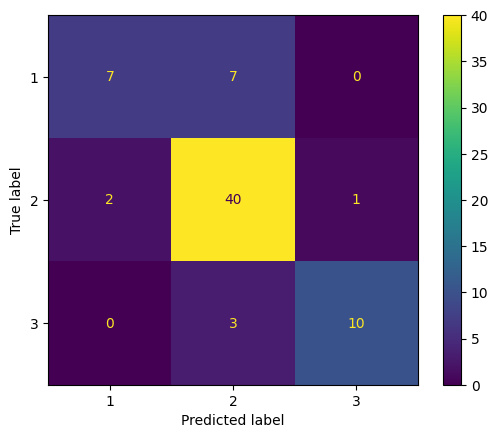

In [14]:
labels = ["1", "2","3"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();